In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Resistor values.
r1 = 33000
r2 = 2000
r3 = 200000
r4 = 20000
r5 = 1200
r6 = 120000

def H(s: complex, c: float) -> complex:
    """Evaluates transfer function of the 2nd order MFIG BP filter.

    The filter frequency only depends on the capacitor used in the
    feedback path.

    Parameters
    ----------
    s
        Complex frequency.
    c
        Capacitor value in Farad.

    Returns
    -------
    complex
        The transfer function value.

    """
    numerator_1 = -s / (r1 * c + 0j)
    denominator_1 = s**2 + s * 2 / (r3 * c + 0j) + (1 / r1 + 1 / r2 + 0j) / (r3 * c**2 + 0j)
    numerator_2 = -s / (r4 * c + 0j)
    denominator_2 = s**2 + s * 2 / (r6 * c + 0j) + (1 / r4 + 1 / r5 + 0j) / (r6 * c**2 + 0j)
    return numerator_1 * numerator_2 / (denominator_1 * denominator_2)

Text(0, 0.5, '$\\|H(\\omega)\\|$ [$dB$]')

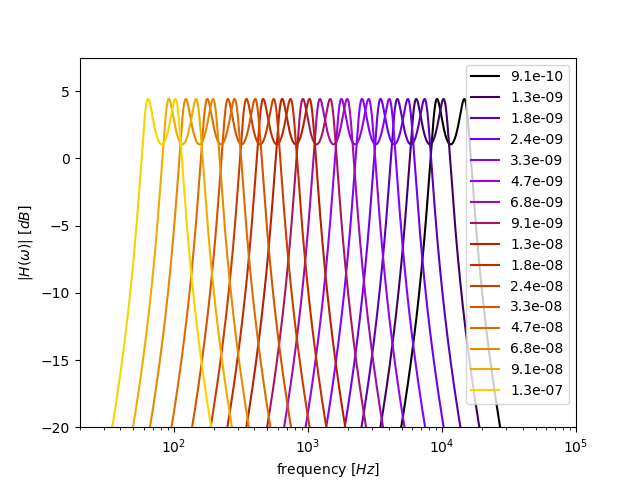

In [3]:
%matplotlib widget

# Capacitor values.
caps = [
    0.91e-9,
    1.3e-9,
    1.8e-9,
    2.4e-9,
    3.3e-9,
    4.7e-9,
    6.8e-9,
    9.1e-9,
    13e-9,
    18e-9,
    24e-9,
    33e-9,
    47e-9,
    68e-9,
    91e-9,
    130e-9,
]

# Complex frequiencies.
s = 1j * np.logspace(0, 6, 10000)
omega = s.imag / (2 * np.pi)

# Plot the transfer functions for all bands.
fig, ax = plt.subplots()

for i, cap, in enumerate(caps):
    color = plt.cm.gnuplot(i / len(caps))
    ax.semilogx(omega, 20 * np.log10(abs(H(s, cap))), c=color, label=f"{cap}")

plt.xlim(20, 100000)
plt.ylim(-20, 7.5)
plt.legend(caps)
plt.xlabel("frequency [$Hz$]")
plt.ylabel("$\|H(\omega)\|$ [$dB$]")